# Import Library

In [658]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [659]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("dataset/nyc-rolling-sales.csv", skipinitialspace=True)

Melihat 5 baris pertama

In [660]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,NaN,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,NaN,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,NaN,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,NaN,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,NaN,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Melihat 5 baris terakhir

In [661]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,NaN,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,NaN,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,NaN,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,NaN,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,NaN,P9,155 CLAY PIT ROAD,NaN,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Melihat dimensi pada data

In [662]:
df.shape

(84548, 22)

Melihat ringkasan pada data

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

Berdasarkan keterangan diatas, menunjukkan pada dataset ini memiliki 84548 baris dan 22 kolom. Adapun untuk type data terdiri dari int64, object, dan float.

Berdasarkan deskripsi pada Kaggle, Kode digit untuk kolom "BOROUGH" berada dalam urutan: 
- Manhattan (1)
- Bronx (2)
- Brooklyn (3)
- Queens (4)
- Staten Island (5).

In [664]:
# Replace "BOROUGH" column
df["BOROUGH"] = df["BOROUGH"].replace({1:"Manhattan", 2:"Bronx", 3:"Brooklyn", 4:"Queens", 5:"Staten Island"})

Konversi type data berdasarkan value yang sesuai

In [665]:
# convert type data object to float
num = ["SALE PRICE", "LAND SQUARE FEET", "GROSS SQUARE FEET"]

for col in num: 
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [666]:
# Convert type data object to datetime from "SALE DATE" column
df["SALE DATE"] = pd.to_datetime(df["SALE DATE"])

# Add column "SALE Month" and "SALE YEAR" based on "SALE DATE"
df["SALE MONTH"] = pd.DatetimeIndex(df["SALE DATE"]).month
df["SALE YEAR"] = pd.DatetimeIndex(df["SALE DATE"]).year

In [667]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      84548 non-null  int64         
 1   BOROUGH                         84548 non-null  object        
 2   NEIGHBORHOOD                    84548 non-null  object        
 3   BUILDING CLASS CATEGORY         84548 non-null  object        
 4   TAX CLASS AT PRESENT            83810 non-null  object        
 5   BLOCK                           84548 non-null  int64         
 6   LOT                             84548 non-null  int64         
 7   EASE-MENT                       0 non-null      float64       
 8   BUILDING CLASS AT PRESENT       83810 non-null  object        
 9   ADDRESS                         84548 non-null  object        
 10  APARTMENT NUMBER                19052 non-null  object        
 11  ZI

Type data diatas sudah sesuai dengan value dari masing-masing kolom

# Cleaning Data

Melihat ringkasan nilai yang hilang pada masing-masing kolom

In [668]:
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
SALE MONTH                            0
SALE YEAR                             0
dtype: int64

Berdasarkan keterangan diatas, menunjukkan missing values dari masing-masing kolom, diantaranya adalah:

- Pada kolom "TAX CLASS AT PRESENT" terdapat 738 missing value.
- Pada kolom "EASE-MENT" terdapat 84548 missing value, dimana seluruh rows pada kolom tersebut tidak memiliki nilai.
- Pada kolom "BUILDING CLASS AT PRESENT" terdapat 738 missing value.
- Pada kolom "APARTMENT NUMBER" terdapat 65496 missing value, dimana hampir seluruh rows pada kolom tersebut tidak memiliki nilai.
- Pada kolom "LAND SQUARE FEET" terdapat 26252 missing value.
- Pada kolom "GROSS SQUARE FEET" terdapat 27612 missing value.
- Pada kolom "SALE PRICE" terdapat 14561 missing value.

Hapus kolom "Unnamed: 0", "EASE-MENT", "APARTMENT NUMBER" karena tidak diperlukan

In [669]:
# drop "Unnamed: 0" column
df.drop(["Unnamed: 0", "EASE-MENT", "APARTMENT NUMBER"], axis = 1, inplace = True)

Cek duplikasi data pada dataframe

In [670]:
print("Jumlah duplikasi data pada data: ", sum(df.duplicated()))

Jumlah duplikasi data pada data:  765


Hapus dan Cek kembali Duplikasi Data

In [671]:
# delete duplicate data
df.drop_duplicates(inplace = True)
print("Total Duplikasi data setelah di hapus:", sum(df.duplicated()))

# Dimension dataset
print("Jumlah baris pada data menjadi: ", df.shape)

Total Duplikasi data setelah di hapus: 0
Jumlah baris pada data menjadi:  (83783, 21)


Mengisi missing value pada kolom "LAND SQUARE FEET" dan "GROSS SQUARE FEET" menggunakan data MEAN pada kolom tersebut

In [672]:
# Handling Missing Value ini the "LAND SQUARE FEET" column
df["LAND SQUARE FEET"].fillna(df["LAND SQUARE FEET"].mean(), inplace = True)

# Handling Missing Value ini the "GROSS SQUARE FEET" column
df["GROSS SQUARE FEET"].fillna(df["GROSS SQUARE FEET"].mean(), inplace = True)

Mengisi missing value pada kolom "TAX CLASS AT PRESENT" dan "BUILDING CLASS AT PRESENT" menggunakan data MODE pada kolom tersebut

In [673]:
# Handling Missing Value in the "TAX CLASS AT PRESENT" column
df["TAX CLASS AT PRESENT"].fillna(df["TAX CLASS AT PRESENT"].mode()[0], inplace=True)

# Handling Missing Value in the "BUILDING CLASS AT PRESENT" column
df["BUILDING CLASS AT PRESENT"].fillna(df["BUILDING CLASS AT PRESENT"].mode()[0], inplace = True)

Menghapus missing value dan nilai 0 pada kolom "ZIP CODE", "LAND SQUARE FEET", "GROSS SQUARE FEET", "TOTAL UNITS", "YEAR BUILT" dan "SALE PRICE"

In [674]:
df = df[df["ZIP CODE"]!= 0]
df = df[df["LAND SQUARE FEET"] != 0]
df = df[df[ "GROSS SQUARE FEET"] != 0]
df = df[df[ "TOTAL UNITS"] != 0]
df = df[df["YEAR BUILT"] != 0]
df = df[df["SALE PRICE"] != 0]
df.dropna(subset=["SALE PRICE"], inplace=True)

Melihat ringkasan dari data setelah dihapus nya nilai 0.

In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36814 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         36814 non-null  object        
 1   NEIGHBORHOOD                    36814 non-null  object        
 2   BUILDING CLASS CATEGORY         36814 non-null  object        
 3   TAX CLASS AT PRESENT            36814 non-null  object        
 4   BLOCK                           36814 non-null  int64         
 5   LOT                             36814 non-null  int64         
 6   BUILDING CLASS AT PRESENT       36814 non-null  object        
 7   ADDRESS                         36814 non-null  object        
 8   ZIP CODE                        36814 non-null  int64         
 9   RESIDENTIAL UNITS               36814 non-null  int64         
 10  COMMERCIAL UNITS                36814 non-null  int64         
 11  TO

Melihat kembali ringkasan nilai yang hilang pada masing-masing kolom

In [676]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
SALE MONTH                        0
SALE YEAR                         0
dtype: int64

# Measure of Central Tendency

## Mean

Mean (rata-rata) Sale Price di New York

In [677]:
mean_sale_price = df["SALE PRICE"].mean()
print("Mean (rata-rata) Sale Price di 5 Borough New York adalah {:.2f}".format(mean_sale_price))

Mean (rata-rata) Sale Price di 5 Borough New York adalah 1790414.64


Mean (rata-rata) Sale Price di setiap Borough di Kota New York

In [678]:
manhattan = df[df["BOROUGH"] == "Manhattan"]
mean_mht = manhattan["SALE PRICE"].mean()

print("Baris data:", len(manhattan))
print("Mean (rata-rata) Sale Price di Manhattan adalah {:.2f}".format(mean_mht))

Baris data: 5939
Mean (rata-rata) Sale Price di Manhattan adalah 5883647.47


In [679]:
bronx = df[df["BOROUGH"] == "Bronx"]
mean_brx = bronx["SALE PRICE"].mean()

print("Baris data:", len(bronx))
print("Mean (rata-rata) Sale Price di Bronx adalah {:.2f}".format(mean_brx))

Baris data: 3503
Mean (rata-rata) Sale Price di Bronx adalah 1023815.62


In [680]:
brooklyn = df[df["BOROUGH"] == "Brooklyn"]
mean_brk = brooklyn["SALE PRICE"].mean()

print("Baris data:", len(brooklyn))
print("Mean (rata-rata) Sale Price di Brooklyn adalah {:.2f}".format(mean_brk))

Baris data: 8619
Mean (rata-rata) Sale Price di Brooklyn adalah 1506006.42


In [681]:
queens = df[df["BOROUGH"] == "Queens"]
mean_qns = queens["SALE PRICE"].mean()

print("Baris data:", len(queens))
print("Mean (rata-rata) Sale Price di Queens adalah {:.2f}".format(mean_qns))

Baris data: 13044
Mean (rata-rata) Sale Price di Queens adalah 881846.32


In [682]:
staten_island = df[df["BOROUGH"] == "Staten Island"]
mean_si = staten_island["SALE PRICE"].mean()

print("Baris data:", len(staten_island))
print("Mean (rata-rata) Sale Price di Staten Island adalah {:.2f}".format(mean_si))

Baris data: 5709
Mean (rata-rata) Sale Price di Staten Island adalah 507942.43


## Median

Median (nilai tengah) Sale Price di New York

In [683]:
median_sale_price = df["SALE PRICE"].mean()
print("Median (nilai tengah) Sale Price di 5 Borough New York adalah {:.2f}".format(median_sale_price))

Median (nilai tengah) Sale Price di 5 Borough New York adalah 1790414.64


Median (nilai tengah) Sale Price di setiap Borough di Kota New York

In [684]:
median_mht = manhattan["SALE PRICE"].median()
print("Median (nilai tengah) Sale Price di Manhattan adalah {:.2f}".format(median_mht))

Median (nilai tengah) Sale Price di Manhattan adalah 1890000.00


In [685]:
median_brx = bronx["SALE PRICE"].median()
print("Median (nilai tengah) Sale Price di Bronx adalah {:.2f}".format(median_brx))

Median (nilai tengah) Sale Price di Bronx adalah 480000.00


In [686]:
median_brk = brooklyn["SALE PRICE"].median()
print("Median (nilai tengah) Sale Price di Brooklyn adalah {:.2f}".format(median_brk))

Median (nilai tengah) Sale Price di Brooklyn adalah 850000.00


In [687]:
median_qns = queens["SALE PRICE"].median()
print("Median (nilai tengah) Sale Price di Queens adalah {:.2f}".format(median_qns))

Median (nilai tengah) Sale Price di Queens adalah 630000.00


In [688]:
median_si = staten_island["SALE PRICE"].median()
print("Median (nilai tengah) Sale Price di Staten Island adalah {:.2f}".format(median_si))

Median (nilai tengah) Sale Price di Staten Island adalah 470000.00


## Mode

Median (nilai tengah) Sale Price di New York

In [689]:
mode_sale_price = df["SALE PRICE"].mode()
print("Mode (modus) Sale Price di 5 Borough New York adalah {}".format(mode_sale_price[0]))

Mode (modus) Sale Price di 5 Borough New York adalah 10.0


Mode (modus) Sale Price di setiap Borough di Kota New York

In [690]:
mode_mht = manhattan["SALE PRICE"].mode()
print("Mode (modus) Sale Price di Manhattan adalah {:.2f}".format(mode_mht[0]))

Mode (modus) Sale Price di Manhattan adalah 10.00


In [691]:
mode_brx = bronx["SALE PRICE"].mode()
print("Mode (modus) Sale Price di Bronx adalah {:.2f}".format(mode_brx[0]))

Mode (modus) Sale Price di Bronx adalah 10.00


In [692]:
mode_brk = brooklyn["SALE PRICE"].mode()
print("Mode (modus) Sale Price di Brooklyn adalah {:.2f}".format(mode_brk[0]))

Mode (modus) Sale Price di Brooklyn adalah 10.00


In [693]:
mode_qns = queens["SALE PRICE"].mode()
print("Mode (modus) Sale Price di Queens adalah {:.2f}".format(mode_qns[0]))

Mode (modus) Sale Price di Queens adalah 10.00


In [694]:
mode_si = staten_island["SALE PRICE"].mode()
print("Mode (modus) Sale Price di Staten Island adalah {:.2f}".format(mode_si[0]))

Mode (modus) Sale Price di Staten Island adalah 10.00


# Measure of Spread

## Range

In [695]:
range_sale_price = np.ptp(df["SALE PRICE"])
print("Range Sale Price di 5 Borough New York adalah {:.2f}".format(range_sale_price))

Range Sale Price di 5 Borough New York adalah 2209999999.00


Range Sale Price di setiap Borough di Kota New York

In [696]:
range_mht = np.ptp(manhattan["SALE PRICE"])
print("Range Sale Price di Manhattan adalah {:.2f}".format(range_mht))

Range Sale Price di Manhattan adalah 2209999999.00


In [697]:
range_brx =  np.ptp(bronx["SALE PRICE"])
print("Range Sale Price di Bronx adalah {:.2f}".format(range_brx))

Range Sale Price di Bronx adalah 109999999.00


In [698]:
range_brk =  np.ptp(brooklyn["SALE PRICE"])
print("Range Sale Price di Bronx adalah {:.2f}".format(range_brk))

Range Sale Price di Bronx adalah 154249999.00


In [699]:
range_qns =  np.ptp(queens["SALE PRICE"])
print("Range Sale Price di Bronx adalah {:.2f}".format(range_qns))

Range Sale Price di Bronx adalah 257499999.00


In [700]:
range_si =  np.ptp(staten_island["SALE PRICE"])
print("Range Sale Price di Bronx adalah {:.2f}".format(range_si))

Range Sale Price di Bronx adalah 11899999.00


## Variance

In [701]:
variance_sale_price = statistics.variance(df["SALE PRICE"])
print("Variance sale price di 5 Borough New York adalah", variance_sale_price)

Variance sale price di 5 Borough New York adalah 236210399287552.66


In [702]:
variance_ru = statistics.variance(df["RESIDENTIAL UNITS"])
print("Variance Residential Unit adalah {:.2f}".format(variance_ru))

Variance Residential Unit adalah 317.54


In [703]:
variance_cu = statistics.variance(df["COMMERCIAL UNITS"])
print("Variance Commercial Unit adalah {:.2f}".format(variance_cu))

Variance Commercial Unit adalah 151.37


In [704]:
variance_tot_units = statistics.variance(df["TOTAL UNITS"])
print("Variance Total Unit adalah {:.2f}".format(variance_tot_units))

Variance Total Unit adalah 474.38


In [705]:
variance_lsf = statistics.variance(df["LAND SQUARE FEET"])
print("Variance Land Square Feet adalah {:.2f}".format(variance_lsf))

Variance Land Square Feet adalah 923973640.51


In [706]:
variance_gsf = statistics.variance(df["GROSS SQUARE FEET"])
print("Variance Gross Square Feet adalah {:.2f}".format(variance_gsf))

Variance Gross Square Feet adalah 903556402.78


## Standard Deviation

In [707]:
std_sale_price = statistics.stdev(df["SALE PRICE"])
print("Standard Deviation Pale Price di 5 Borough New York adalah {:.2f}".format(std_sale_price))

Standard Deviation Pale Price di 5 Borough New York adalah 15369137.88


In [708]:
std_ru = statistics.stdev(df["RESIDENTIAL UNITS"])
print("Standard Deviation Residential Unit adalah {:.2f}".format(std_ru))

Standard Deviation Residential Unit adalah 17.82


In [709]:
std_cu = statistics.stdev(df["COMMERCIAL UNITS"])
print("Standard Deviation Commercial Unit adalah {:.2f}".format(std_cu))

Standard Deviation Commercial Unit adalah 12.30


In [710]:
std_tot_units = statistics.stdev(df["TOTAL UNITS"])
print("Standard Deviation 'Total Units' adalah {:.2f}".format(std_tot_units))

Standard Deviation 'Total Units' adalah 21.78


In [711]:
std_lsf = statistics.stdev(df["LAND SQUARE FEET"])
print("Standard Deviation Land Square Feet adalah {:.2f}".format(std_lsf))

Standard Deviation Land Square Feet adalah 30396.93


In [712]:
std_gsf = statistics.stdev(df["GROSS SQUARE FEET"])
print("Standard Deviation Gross Square Feet adalah {:.2f}".format(std_gsf))

Standard Deviation Gross Square Feet adalah 30059.21


#  Probability Distribution

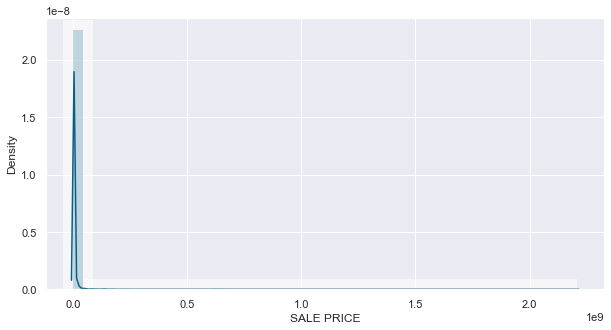

In [713]:
sns.set(color_codes = True)
sns.set(rc = {"figure.figsize":(10,5)})
ax = sns.distplot(df["SALE PRICE"], kde = True, color = "#0B5E84", hist_kws={"linewidth":20, "alpha":0.6})

Mengambil data Sale Price dengan rentang harga 100 hingga 7000000

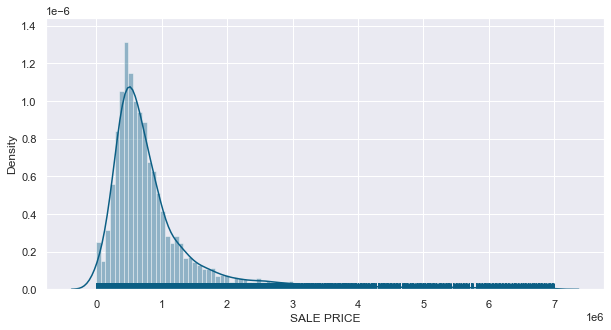

In [714]:
data_sale_price = df[(df["SALE PRICE"] > 100) & (df["SALE PRICE"] < 7000000)]["SALE PRICE"]
ax = sns.distplot(data_sale_price, bins=100, kde=True, rug=True, color="#0B5E84")

# Confidence Intervals

Calculation of Confidence Intervals

Melihat Mean, Standard Deviation, dan populalsi size

In [715]:
df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                       
                       mean           std     size
BOROUGH                                           
Bronx          1.023816e+06  3.804801e+06   3503.0
Brooklyn       1.506006e+06  4.732968e+06   8619.0
Manhattan      5.883647e+06  3.710324e+07   5939.0
Queens         8.818463e+05  3.432667e+06  13044.0
Staten Island  5.079424e+05  4.598667e+05   5709.0

In [716]:
# Manhattan

mean_mht = 5883647.47   #Mean Sale Price of Manhattan
sd = 37103241.57        #Standard deviation for Manhattan population
n = 5939                #Total number of Manhattan
z = 1.96                #z-score from the z table mentioned before
se = sd / np.sqrt(n)    #Calculate the standard error using the formula for the standard error of the mean

Construct the CI

In [717]:
lcb = mean_mht - z* se #lower limit of the CI
ucb = mean_mht + z* se #upper limit of the CI
print("CI adalah {} dan {}".format(lcb, ucb))

CI adalah 4939996.778131185 dan 6827298.161868814


# Hypothesis Testing

In [718]:
# Creating the dataset
manhattan = df[df["BOROUGH"] == "Manhattan"]
staten_island = df[df["BOROUGH"] == "Staten Island"]

In [719]:
mean_mht = manhattan["SALE PRICE"].mean()
sd_mht = manhattan["SALE PRICE"].std()
print("Mean:", mean_mht)
print("Standard Deviation:", sd_mht)
print("Baris Data Manhattan:", len(manhattan))

Mean: 5883647.468092271
Standard Deviation: 37103241.57039265
Baris Data Manhattan: 5939


In [720]:
mean_si = staten_island["SALE PRICE"].mean()
sd_si = staten_island["SALE PRICE"].std()
print("Mean:", mean_si)
print("Standard Deviation:", sd_si)
print("Baris Data Staten Island:", len(staten_island))

Mean: 507942.4307234192
Standard Deviation: 459866.71606953867
Baris Data Staten Island: 5709


In [721]:
sm.stats.ztest(manhattan["SALE PRICE"], staten_island["SALE PRICE"], alternative="two-sided")

(10.946387385078022, 6.915084003615056e-28)

Karena p-value (6.91e-28) sangat kecil dan kurang dari 0.05, maka hipotesis nol ditolak.

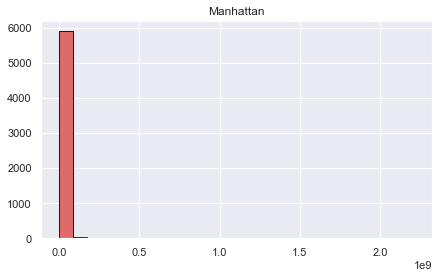

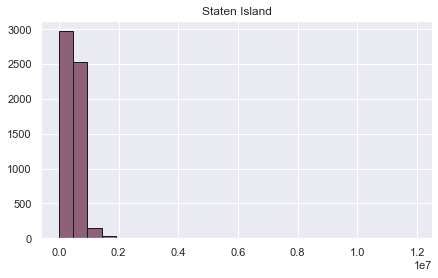

In [722]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.title("Manhattan")
plt.hist(manhattan["SALE PRICE"], edgecolor = "k", color = "#e06969", bins = 25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Staten Island")
plt.hist(staten_island["SALE PRICE"], edgecolor = "k", color = "#8f6179", bins = 25)
plt.show()


Normality Test

In [723]:
data = df["SALE PRICE"]

In [724]:
# Shapiro Wilk Test
stat, p = shapiro(data)
print("stat=%.3f, p=%.3f" % (stat, p))
if p > 0.05:
    print("Probably Gaussian")
else:
    print("Probably not Gaussian")

stat=0.040, p=0.000
Probably not Gaussian


In [725]:
# D'Agostino's K^2 Test
stat, p = normaltest(data)
print("stat=%.3f, p=%.3f" % (stat, p))
if p > 0.05:
    print("Probably Gaussian")
else:
    print("Probably not Gaussian")

stat=144264.906, p=0.000
Probably not Gaussian


In [726]:
# Anderson-Darling Test
data = df["SALE PRICE"]
result = anderson(data)
print("stat=%.3f" % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print("Probbaly gaussian at the %.1f%% level" % (sl))
    else:
        print("Probbaly not gaussian at the %.1f%% level" % (sl))

stat=11669.261
Probbaly not gaussian at the 15.0% level
Probbaly not gaussian at the 10.0% level
Probbaly not gaussian at the 5.0% level
Probbaly not gaussian at the 2.5% level
Probbaly not gaussian at the 1.0% level
